In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('House Price Prediction Dataset.csv')

print(df.head())
print(df.describe())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.0

In [ ]:
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']]

y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 250434.23
Mean Squared Error (MSE): 86884955530.52
Root Mean Squared Error (RMSE): 294762.54


In [ ]:
new_data = pd.DataFrame({'Area': [2500], 'Bedrooms': [4], 'Bathrooms': [3], 'Floors': [2], 'YearBuilt': [2010]})
new_pred = model.predict(new_data)
print(f'Predicted house price: {new_pred[0]:.2f}')

Predicted house price: 469338.57


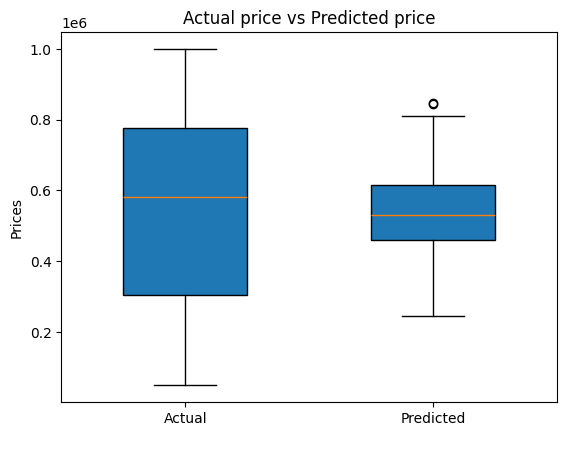

In [ ]:
plt.boxplot([y_test, y_pred], positions=[1, 2], widths=0.5, patch_artist=True)

plt.xlabel(' ')
plt.ylabel('Prices')
plt.title('Actual price vs Predicted price')
plt.xticks([1, 2], ['Actual', 'Predicted'])
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('House Price Prediction Dataset.csv')
X = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
k_values = [3, 5, 7]
mae_values = []
mse_values = []
rmse_values = []

In [ ]:
for k in k_values:

    model = KNeighborsRegressor(n_neighbors=k)

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

In [ ]:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)

print(f'KNN Regression Model (k=3): MAE={mae_values[0]:.2f}, MSE={mse_values[0]:.2f}, RMSE={rmse_values[0]:.2f}')
print(f'KNN Regression Model (k=5): MAE={mae_values[1]:.2f}, MSE={mse_values[1]:.2f}, RMSE={rmse_values[1]:.2f}')
print(f'KNN Regression Model (k=7): MAE={mae_values[2]:.2f}, MSE={mse_values[2]:.2f}, RMSE={rmse_values[2]:.2f}')
print(f'Linear Regression Model: MAE={mae_lr:.2f}, MSE={mse_lr:.2f}, RMSE={rmse_lr:.2f}')

NameError: name 'LinearRegression' is not defined

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

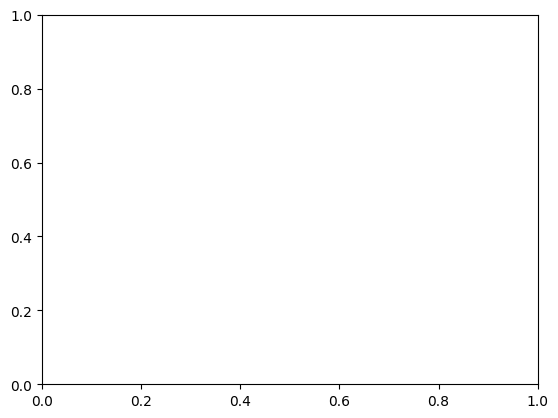

In [ ]:
plt.plot(k_values, mae_values, label='MAE')
plt.plot(k_values, mse_values, label='MSE')
plt.plot(k_values, rmse_values, label='RMSE')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Relationship between k and Model Accuracy')
plt.legend()
plt.show()